## Section 1: Loading Data ##
This section will only be run once and does not need to be run again

In [104]:
#DONT RUN THIS ANYMORE
from datasets import load_dataset, Dataset
from convokit import Corpus, download


""" Formal"""
ds_un_docs = load_dataset("Helsinki-NLP/un_pc", "en-es")
ds_un_debates = load_dataset('csv', data_files="source_datasets/un-general-debates.csv") # formal]

#https://huggingface.co/datasets/kariatouk/enron_curated_labeled/tree/main
ds_enron= load_dataset('csv', data_files='source_datasets/enron_labeled_curated.csv') #enron, very formal business emails probably?
#city council meetings instead https://huggingface.co/datasets/lytang/MeetingBank-transcript?row=8&library=datasets
ds_business_meetings = load_dataset("lytang/MeetingBank-transcript") 

""" Semi-formal"""
ds_medium = load_dataset('csv', data_files='source_datasets/medium_articles.csv') #medium articles, academic but also likely less formal ? community contributions
#https://huggingface.co/datasets/kariatouk/enron_curated_labeled/tree/main
ds_podcast_news = load_dataset("Whispering-GPT/lex-fridman-podcast")

"""Educational"""
ds_edu = load_dataset("Locutusque/UltraTextbooks") #synthetic and human written textbooks..... acdademic / formal
#https://huggingface.co/datasets/fabiochiu/medium-articles
# khan academy dataset
ds_khan_edu = load_dataset("iblai/ibl-khanacademy-transcripts")

"""Informal"""
ds_sms = load_dataset("ucirvine/sms_spam") #should only use ham labels, text messages, informal
ds_telephone_convos = Corpus(filename=download("switchboard-corpus"))

data = ds_telephone_convos.get_utterances_dataframe() 
data_list = data.to_dict(orient="records")
ds_telephone_convos = Dataset.from_list(data_list)


#this cell ran in 21 minutes (probably don't have to load the whole dataset?)

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/17 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/23 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/91 [00:00<?, ?it/s]

Dataset already exists at /Users/rheamadhogarhia/.convokit/saved-corpora/switchboard-corpus


In [105]:
#TRAIN SETS, choosing 500 samples frome each written text set
num_samples = 300

ds_un_docs_sub = ds_un_docs["train"].shuffle(seed=42).select(range(num_samples))
#filtering out the spam label - only getting legitimate texts
ds_sms_filtered = ds_sms["train"].filter(lambda example: example['label'] == 0)
ds_sms_sub = ds_sms_filtered.shuffle(seed=42).select(range(num_samples + 100)) #adding 100 just because messages are short
ds_edu_sub = ds_edu["train"].shuffle(seed=42).select(range(num_samples))
ds_medium_sub = ds_medium["train"].shuffle(seed=42).select(range(num_samples))
ds_enron_sub = ds_enron["train"].shuffle(seed=42).select(range(num_samples))


ds_podcast_news_sub = ds_podcast_news["train"].shuffle(seed=42).select(range(100))#podcasts are long so only gonna use 100 samples
ds_telephone_sub = ds_telephone_convos.shuffle(seed=42).select(range(200, 500))
ds_khan_edu_sub = ds_khan_edu["train"].shuffle(seed=42).select(range(num_samples))
ds_business_meetings_sub = ds_business_meetings["train"].shuffle(seed=42).select(range(num_samples))
ds_un_debates_sub = ds_un_debates["train"].shuffle(seed=42).select(range(num_samples))

In [106]:
ds_telephone_sub[0:1]["text"]

['[ Have, + have ] you gone straight through? /']

In [107]:
#combine
from datasets import Dataset, concatenate_datasets
import random

un_docs_dataset = Dataset.from_dict({"text": ds_un_docs_sub["translation"], 
                                     "source": ["un_corpus"] * len(ds_un_docs_sub),
                                     "formality": ["formal"] * len(ds_un_docs_sub)})
#print(un_docs_dataset[:2])
medium_dataset = Dataset.from_dict({"text": ds_medium_sub["text"], 
                                    "source": ["medium"] * len(ds_medium_sub),
                                    "formality": ["semiformal"] * len(ds_medium_sub)})
edu_dataset = Dataset.from_dict({"text": ds_edu_sub["text"], 
                                 "source": ["textbooks"] * len(ds_edu_sub),
                                 "formality": ["educational"] * len(ds_edu_sub)})
sms_dataset = Dataset.from_dict({"text": ds_sms_sub["sms"], 
                                 "source": ["sms"] * len(ds_sms_sub), 
                                 "formality": ["informal"] * len(ds_sms_sub)})
enron_dataset = Dataset.from_dict({"text": ds_enron_sub["email"], 
                                   "source": ["enron_emails"] * len(ds_enron_sub), 
                                   "formality": ["formal"] * len(ds_enron_sub)})



podcast_news_dataset = Dataset.from_dict({"text": ds_podcast_news_sub["text"], 
                                     "source": ["podcasts"] * len(ds_podcast_news_sub), 
                                     "formality": ["semiformal"] * len(ds_podcast_news_sub)})
un_debates_dataset = Dataset.from_dict({"text": ds_un_debates_sub["text"], 
                                   "source": ["un_debates"] * len(ds_un_debates_sub),
                                   "formality": ["formal"] * len(ds_un_debates_sub)})
khan_edu_dataset = Dataset.from_dict({"text": ds_khan_edu_sub["content"], 
                                 "source": ["khan_academy"] * len(ds_khan_edu_sub),
                                 "formality": ["educational"] * len(ds_khan_edu_sub)})
print(khan_edu_dataset[:2])
telephone_dataset = Dataset.from_dict({"text": ds_telephone_sub["text"], 
                                    "source": ["telephone_convos"] * len(ds_telephone_sub), 
                                    "formality": ["informal"] * len(ds_telephone_sub)})
business_meetings_dataset = Dataset.from_dict({"text": ds_business_meetings_sub["source"], 
                                 "source": ["business_meetings"] * len(ds_business_meetings_sub),
                                 "formality": ["formal"] * len(ds_business_meetings_sub)})



{'text': ['WEBVTT\nKind: captions\nLanguage: en\n\n00:00:00.944 --> 00:00:03.596\n(pop music)\n\n00:00:03.626 --> 00:00:07.552\nLarry: It started with just a\nfew little videos on algebra\n\n00:00:07.552 --> 00:00:11.447\nto help out a cousin who\nneeded assistance in school,\n\n00:00:11.447 --> 00:00:15.128\nand, from there, it grew\nand grew and grew into more\n\n00:00:15.128 --> 00:00:21.049\nthan 3,200 YouTube videos,\ngiving all kinds of instruction.\n\n00:00:21.049 --> 00:00:24.724\nIt\'s known as the Khan Academy,\nbut, more than just that,\n\n00:00:24.724 --> 00:00:27.231\nit\'s leading to a rethinking\nof how education is\n\n00:00:27.231 --> 00:00:30.046\ndelivered in the nation\'s\nclassrooms and at home.\n\n00:00:30.046 --> 00:00:32.466\nSalman Khan\'s new book, The One World\n\n00:00:32.466 --> 00:00:34.836\nSchool House: Education Reimagined.\n\n00:00:34.836 --> 00:00:36.391\nSal, thank you for joining us.\n\n00:00:36.391 --> 00:00:37.351\nWe appreciate it very much.\n\n00

## Section 2: Preprocessing Each Dataset ##

In [108]:
from datasets import load_dataset, Dataset
import re #https://docs.python.org/3/library/re.html

In [109]:
#Preprocess UN Docs

un_docs_dataset = un_docs_dataset.map(lambda item: {"text": item["text"]["en"]}) # I only want the 'en' keys
print(un_docs_dataset[:2])


Map:   0%|          | 0/300 [00:00<?, ? examples/s]

{'text': ['Mr. James Revill Consultant', '118.117. Continue efforts in requesting support to intensify the abilities of Jordan to respond to the needs of Syrian refugees who are present on Jordanian territory (Qatar);'], 'source': ['un_corpus', 'un_corpus'], 'formality': ['formal', 'formal']}


In [110]:
#Preprocess Medium

#maybe get rid of first and last sentence because usually just has author info etc
#get rid of brackted numbers?

def preprocess_medium(text):
    #remove first and last sentence
    sentences = text.split('.')
    if len(sentences) > 2:
        text = '.'.join(sentences[1:-1])
    #bracketed numbers (citations)
    text = re.sub(r'\[\d+\]', '', text)
    return text

medium_dataset = medium_dataset.map(lambda process: {"text": preprocess_medium(process["text"])})

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [111]:
#don't need to special process edu dataset
#Don't need to special Preprocess SMS

In [112]:
def preprocess_enron(text):
    #get rid of Subject: line and also first three sentences or so bc they tend to be garbage...
    text = text.replace("Subject: ", "")
    first_period_index = text.find('.')
    if first_period_index != -1:
        text = text[first_period_index + 1:]

    text = re.sub(r'=', '', text)  # looks like some of the emails have equals signs in between words? will this affect euqations drasticall?
    # WE MIGHT WANT TO TRY BY TAKING OUT MOST PUNCTUATION???? IDK
    return text

enron_dataset = enron_dataset.map(lambda process: {"text": preprocess_enron(process["text"])})

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [113]:
def preprocess_business(text):
    # Remove speaker labels
    text = re.sub(r'Speaker \d+:', '', text)
    return text

business_meetings_dataset = business_meetings_dataset.map(lambda process: {"text": preprocess_business(process["text"])})

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [114]:
def preprocess_khan_text(text):
    #timestamps like 00:00:00.000 --> 00:00:01.749
    text = re.sub(r'\d{2}:\d{2}:\d{2}\.\d{3} --> \d{2}:\d{2}:\d{2}\.\d{3}', '', text)
    
    # Remove ALL CAPS names in transcript "SALMAN KHAN
    text = re.sub(r'[A-Z]{2,}( [A-Z]{2,})*:', '', text)
    
    # extra \n and spaces
    text = re.sub(r'\n+', '\n', text) 
    text = text.strip()  #whitespace
    
    return text

khan_edu_dataset = khan_edu_dataset.map(lambda process: {"text": preprocess_khan_text(process["text"])})

Map:   0%|          | 0/300 [00:00<?, ? examples/s]

In [115]:
#combine datasets
combined_written_dataset = concatenate_datasets([un_docs_dataset, medium_dataset, edu_dataset, sms_dataset, enron_dataset])
combined_written_dataset = combined_written_dataset.add_column("type", ["written"] * len(combined_written_dataset))

combined_spoken_dataset = concatenate_datasets([podcast_news_dataset, un_debates_dataset, khan_edu_dataset, telephone_dataset, business_meetings_dataset])
combined_spoken_dataset = combined_spoken_dataset.add_column("type", ["spoken"] * len(combined_spoken_dataset))

full_dataset = concatenate_datasets([combined_spoken_dataset, combined_written_dataset])

full_dataset = full_dataset.shuffle(seed=42)

In [116]:
def preprocess_all_text(text):
    # Handle NoneType objects
    if text is None:
        return None
    
    text = text.lower()
    #REMOVE URLS AND LINKS
    text = re.sub(r'http\S+|www\.\S+|\.com|\.org|\.net|\.io|\.co|\.uk', '', text)
    #keep basic punc
    text = re.sub(r'[^\w\s.\',;!?\-$()]', '', text)
    #remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Return None if the text is empty after preprocessing
    if not text:
        return None
    
    return text

full_dataset = full_dataset.map(lambda process: {"text": preprocess_all_text(process["text"])})
full_dataset = full_dataset.filter(lambda process: process["text"] is not None and process["text"].strip() != "")


#save
full_dataset.to_csv("spoken_written_full_dataset.csv")

Map:   0%|          | 0/2900 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2900 [00:00<?, ? examples/s]

Creating CSV from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

28902599

In [117]:
#Load in new dataset 
full_dataset = load_dataset('csv', data_files='spoken_written_full_dataset.csv')

Generating train split: 0 examples [00:00, ? examples/s]

In [118]:
len(full_dataset['train']) #should be 1900 because podcasts is only 100

2893

### Step 3: Tokenization for BERT ###

### Step 4: Data Analysis ###

In [119]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from tqdm import tqdm

from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rheamadhogarhia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/rheamadhogarhia/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [120]:
def preprocess_corpus(data):
    """ Tokenize, sentencize, and lowercase the input data.

        Args:
            data: list of strings, where each string is a document

        Return:
            list of lists, with tokenized, lowercased sentences from each of the processed rows
    """
    tokenized_sentences = []

    for doc in tqdm(data):
        sentences = sent_tokenize(doc)
        for sentence in sentences:
            tokenized_sentences.append(word_tokenize(sentence))
    return tokenized_sentences

In [121]:
ds_processed = preprocess_corpus(full_dataset['train']['text'])

100%|██████████| 2893/2893 [00:15<00:00, 191.16it/s]


In [122]:
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Download stopwords list
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def analyze_tokens(tokenized_data):
    """ Perform token & vocabulary analysis.

        Args:
            tokenized_data: List of tokenized sentences (list of lists)
            dataset_name: String, name of the dataset for labeling
    """
    #Flatten tokenized sentences into a single list of words
    all_words = [word for sentence in tokenized_data for word in sentence]

    # Vocabulary size
    vocab_size = len(set(all_words))
    print(f"Vocabulary Size: {vocab_size}")

    # Most common words
    word_counts = Counter(all_words)
    most_common_words = word_counts.most_common(20)
    print(f"Most Common Words:")
    print(most_common_words)

    # Stopword Distribution
    stopword_count = sum(word_counts[word] for word in stop_words if word in word_counts)
    total_words = sum(word_counts.values())
    stopword_ratio = stopword_count / total_words
    print(f"Stopword Ratio: {stopword_ratio:.2%}\n")

    # Plot Most Common Words
    words, counts = zip(*most_common_words)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.xticks(rotation=45)
    plt.title(f"Most Common Words")
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rheamadhogarhia/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Vocabulary Size: 70026
Most Common Words:
[(',', 295144), ('.', 275575), ('the', 273973), ('of', 161587), ('and', 161425), ('to', 150636), ('that', 120670), ('a', 106540), ('i', 88507), ('in', 85365), ('you', 83326), ('it', 80457), ('is', 77571), ("'s", 68211), ('we', 57458), ('this', 44732), ('so', 44251), ('for', 42569), ('have', 34952), ('on', 32990)]
Stopword Ratio: 44.38%



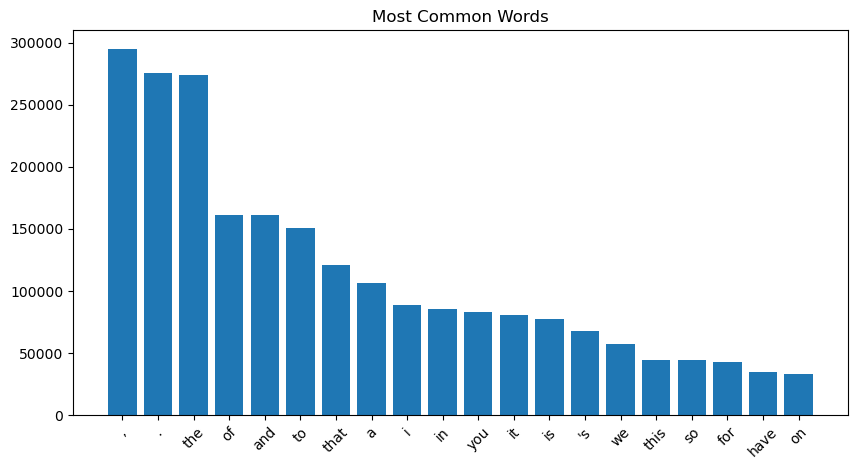

In [123]:
analyze_tokens(ds_processed)

## Section 3: Mini BERT and Shap Testing ##
Going to start testing how BERT/TogetherAI and SHAP will work using a super small subset of the data

In [9]:
import os 
os.environ["TOGETHER_API_KEY"] = "tgp_v1_0k4LmNbB6di_vPP-tYoWKw8_eEO2o6qzpKcYHRt1j9Q"

In [10]:
%pip install together

Note: you may need to restart the kernel to use updated packages.


In [28]:
full_dataset['train']


Dataset({
    features: ['text', 'source', 'formality', 'type'],
    num_rows: 4600
})

In [58]:
"""Sampling 10 texts from each source for testing """
from datasets import concatenate_datasets
ds_sampled = []
sources = full_dataset['train'].unique('source')
for source in sources:
    source_data = full_dataset['train'].filter(lambda example: example['source']==source)
    ds_sampled.append(source_data.shuffle(seed=42).select(range(10)))

ds_sampled = concatenate_datasets(ds_sampled)
ds_sampled = ds_sampled.shuffle(seed=42)

Weak industrial output weighs on British growth (AFP) AFP - Britain's industrial sector appears to have been a bigger drag on overall economic growth in the third quarter than was first assumed.
 The following is a conversation with Jeremy Howard. He's the founder of Fast AI, a research institute dedicated to making deep learning more accessible. He's also a distinguished research scientist at the University of San Francisco, a former president of Kaggle, as well as a top ranking competitor there. And in general, he's a successful entrepreneur, educator, researcher, and an inspiring personality in the AI community. When someone asks me, how do I get started with deep learning? Fast AI is one of the top places I point them to. It's free, it's easy to get started, it's insightful and accessible, and if I may say so, it has very little BS. It can sometimes dilute the value of educational content on popular topics like deep learning. Fast AI has a focus on practical application of deep lea

In [2]:
from together import Together
client = Together()
outputs = client.embeddings.create(input=ds_sampled['text'],model="togethercomputer/m2-bert-80M-32k-retrieval")
outputs

AuthenticationError: The api_key client option must be set either by passing api_key to the client or by setting the TOGETHER_API_KEY environment variable

In [81]:
resp = client.files.upload(file="test.jsonl")

print(resp.model_dump())

FileTypeError: Invalid file supplied, failed to upload. Report:
{'file_size': None,
 'found': False,
 'has_min_samples': None,
 'is_check_passed': False,
 'key_value': None,
 'line_type': None,
 'load_json': None,
 'message': 'Checks passed',
 'num_samples': None,
 'text_field': None,
 'utf8': None}

In [1]:
embeddings = [x.embedding for x in outputs.data]

NameError: name 'outputs' is not defined

In [61]:
import numpy as np
np.save("sample_embeddings.npy", embeddings)
ds_sampled.to_csv("sample_dataset.csv")

Creating CSV from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

1604087

In [78]:
"""Visualize Embeddings"""
import os
import argparse
from typing import List

import matplotlib
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def plot_embeddings(embeddings: List[np.ndarray], sort_type):
    """Plot transformed embedding vectors with predefined labels.

    Args:
        embed_arr_ls: a list of np.ndarray. Each np.ndarray is a matrix with embeddings corresponding to data examples.
        names: a list of str. The names of the data sources. The length of this list should be the same as the length of embed_arr_ls.

    Returns:
        None
    """
    embed_arr_ls = np.array(embeddings)
    tsne = TSNE(n_components=2, perplexity=30, random_state=42, init='random')
    vis_dims = tsne.fit_transform(embed_arr_ls)

    cmap = plt.get_cmap('tab20')
    types = ds_sampled.unique(sort_type)
    types_to_index = {type: i for i, type in enumerate(types)}
    colors = [cmap(i) for i in range(len(types))]
    color_indices = []
    for label in ds_sampled[sort_type]:
        color_indices.append(types_to_index[label])
    assert (len(vis_dims) == len(color_indices))
    
    x = [x for x,_ in vis_dims]
    y = [y for _,y in vis_dims]

    fig, ax = plt.subplots()
    scatter = ax.scatter(x, y, c=color_indices, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
    legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=types,
                        title=sort_type, loc="best")
    ax.add_artist(legend1)

    plt.title("Embedded Visualization using t-SNE")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

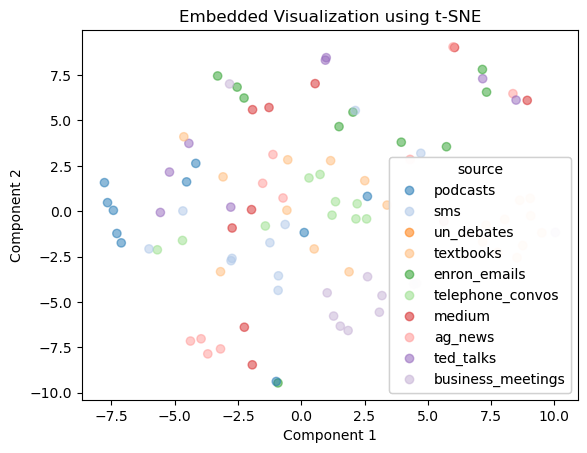

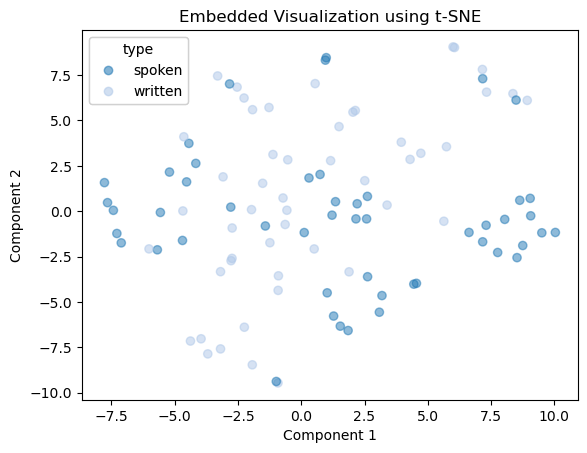

In [79]:
plot_embeddings(embeddings, "source")
plot_embeddings(embeddings, "type")

### Baseline Classification Model ###


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Example embeddings and labels
X = np.array(embeddings)  # Your BERT embeddings
y = np.array(ds_sampled['type'])      # Corresponding labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Evaluate the classifier
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      spoken       0.44      0.80      0.57         5
     written       0.91      0.67      0.77        15

    accuracy                           0.70        20
   macro avg       0.68      0.73      0.67        20
weighted avg       0.79      0.70      0.72        20



###  Classification Model ###

In [106]:
import pandas as pd
import json

labeled_data = pd.DataFrame({"prompt": ds_sampled['text'], "completion": ds_sampled['type']})
labeled_data.to_json("labeled_data.jsonl", orient="records", lines=True)

In [ ]:
with open("labeled_data.jsonl", "r") as f:
    for line in f:
        print(json.loads(line))  # Read line by line

In [107]:
! together files check "labeled_data.jsonl"

{
    "is_check_passed": true,
    "message": "Checks passed",
    "found": true,
    "file_size": 1609419,
    "utf8": true,
    "line_type": true,
    "text_field": true,
    "key_value": true,
    "has_min_samples": true,
    "num_samples": 100,
    "load_json": true,
    "filetype": "jsonl"
}


In [123]:
! split_ratio=0.9

!total_lines=$(wc -l < "labeled_data.jsonl")
! split_lines=$((total_lines * split_ratio))

! head -n $((split_lines)) "labeled_data.jsonl" > "labeled_data_train.jsonl"
! tail -n +$((split_lines + 1)) "labeled_data.jsonl" > "labeled_data_validation.jsonl"

head: illegal line count -- 0


Ran the below code (above had issue with float to integer conversion will figure that out later)

In [125]:
! head -n $90 "labeled_data.jsonl" > "labeled_data_train.jsonl"
! tail -n +$91 "labeled_data.jsonl" > "labeled_data_validation.jsonl"

In [126]:
! together files upload "labeled_data_validation.jsonl"
! together files upload "labeled_data_train.jsonl"

Uploading file labeled_data_validation.jsonl: 100%|█| 166k/166k [00:01<00:00, 14
{
    "id": "file-e19da27e-62d2-4160-97db-8bc33c838eef",
    "object": "file",
    "created_at": 1739910042,
    "purpose": "fine-tune",
    "filename": "labeled_data_validation.jsonl",
    "bytes": 0,
    "line_count": 0,
    "processed": false,
    "FileType": "jsonl"
}
Uploading file labeled_data_train.jsonl: 100%|█| 1.44M/1.44M [00:02<00:00, 556kB
{
    "id": "file-eb8f518d-111b-4fe3-b906-48701a5d4788",
    "object": "file",
    "created_at": 1739910046,
    "purpose": "fine-tune",
    "filename": "labeled_data_train.jsonl",
    "bytes": 0,
    "line_count": 0,
    "processed": false,
    "FileType": "jsonl"
}


In [127]:
! together files list

+----+-------------------------------+-------------------------------------------+----------+-----------------------------+--------------+
|    | File name                     | File ID                                   | Size     | Created At                  |   Line Count |
+====+===============================+===========================================+==========+=============================+==============+
|  0 | labeled_data.jsonl            | file-9ef3ae0f-1264-4638-b53c-1ec5135872f0 | 1.5 MB   | 2025-02-18T14:10:45.000000Z |            0 |
+----+-------------------------------+-------------------------------------------+----------+-----------------------------+--------------+
|  1 | labeled_data_validation.jsonl | file-e19da27e-62d2-4160-97db-8bc33c838eef | 161.9 KB | 2025-02-18T14:20:42.000000Z |            0 |
+----+-------------------------------+-------------------------------------------+----------+-----------------------------+--------------+
|  2 | labeled_data_train.j

In [129]:
! together fine-tuning create --training-file "file-eb8f518d-111b-4fe3-b906-48701a5d4788" --validation-file "file-e19da27e-62d2-4160-97db-8bc33c838eef"" --model "meta-llama/Llama-3.2-3B-Instruct"

zsh:1: unmatched "


In [131]:
import os
from together import Together

client = Together(api_key=os.environ.get("TOGETHER_API_KEY"))

response = client.fine_tuning.create(
  training_file = "file-eb8f518d-111b-4fe3-b906-48701a5d4788",
  validation_file="file-e19da27e-62d2-4160-97db-8bc33c838eef",
  model = 'meta-llama/Llama-3.2-3B-Instruct',
)

print(response)

id='ft-97a421eb-211c-4466-a129-b5b56377492f' training_file='file-eb8f518d-111b-4fe3-b906-48701a5d4788' validation_file='file-e19da27e-62d2-4160-97db-8bc33c838eef' model='meta-llama/Llama-3.2-3B-Instruct' output_name='shivanipuli/Llama-3.2-3B-Instruct-cda8425f' adapter_output_name=None n_epochs=1 n_checkpoints=1 n_evals=0 batch_size=40 learning_rate=1e-05 lr_scheduler=FinetuneLRScheduler(lr_scheduler_type='linear', lr_scheduler_args=FinetuneLinearLRSchedulerArgs(min_lr_ratio=0.0)) warmup_ratio=0.0 max_grad_norm=1.0 weight_decay=0.0 eval_steps=0 training_type=LoRATrainingType(type='Lora', lora_r=64, lora_alpha=128, lora_dropout=0.0, lora_trainable_modules='all-linear') created_at='2025-02-18T20:22:12.596Z' updated_at='2025-02-18T20:22:12.596Z' status=<FinetuneJobStatus.STATUS_PENDING: 'pending'> job_id='' events=[FinetuneEvent(object=<ObjectType.FinetuneEvent: 'fine-tune-event'>, created_at='2025-02-18T20:22:12.596Z', level=<FinetuneEventLevels.NULL: ''>, message='Fine tune request creat

In [132]:
from together import Together

client = Together()

response = client.chat.completions.create(
    model="shivanipuli/Llama-3.2-3B-Instruct-cda8425f",
    messages=[{"role": "user", "content": "What are some fun things to do in New York?"}],
)
print(response.choices[0].message.content)

New York City is a vibrant and diverse metropolis with endless options for entertainment, culture, and adventure. Here are some fun things to do in New York:

**Iconic Landmarks:**

1. Visit the Statue of Liberty and Ellis Island: Take a ferry to Liberty Island to see the iconic statue up close and visit the Ellis Island Immigration Museum.
2. Explore the Empire State Building: Enjoy panoramic views of the city from the observation deck on the 86th floor.
3. Walk across the Brooklyn Bridge: Take in the stunning views of the Manhattan skyline and the East River.

**Museums and Galleries:**

1. The Metropolitan Museum of Art: One of the world's largest and most famous museums, with a collection of art and artifacts from around the world.
2. The Museum of Modern Art (MoMA): A must-visit for modern art enthusiasts, with a collection of works by Warhol, Pollock, and Matisse.
3. The American Museum of Natural History: Explore the wonders of the natural world, from dinosaurs to space explorat

### Questions to Ask Karen ####
Question 1
1. Option 1: Together AI has a BERT embedding model but then we need to use our own trainer in order to train it for classification
2. Option 2: Looks like Together AI has fine tuning models too but I don't see any for classification
Unsure which model to use

Question 2:
What size model will be sufficient?

### SHAP Testing on Baseline ### 

In [134]:
! pip install shap

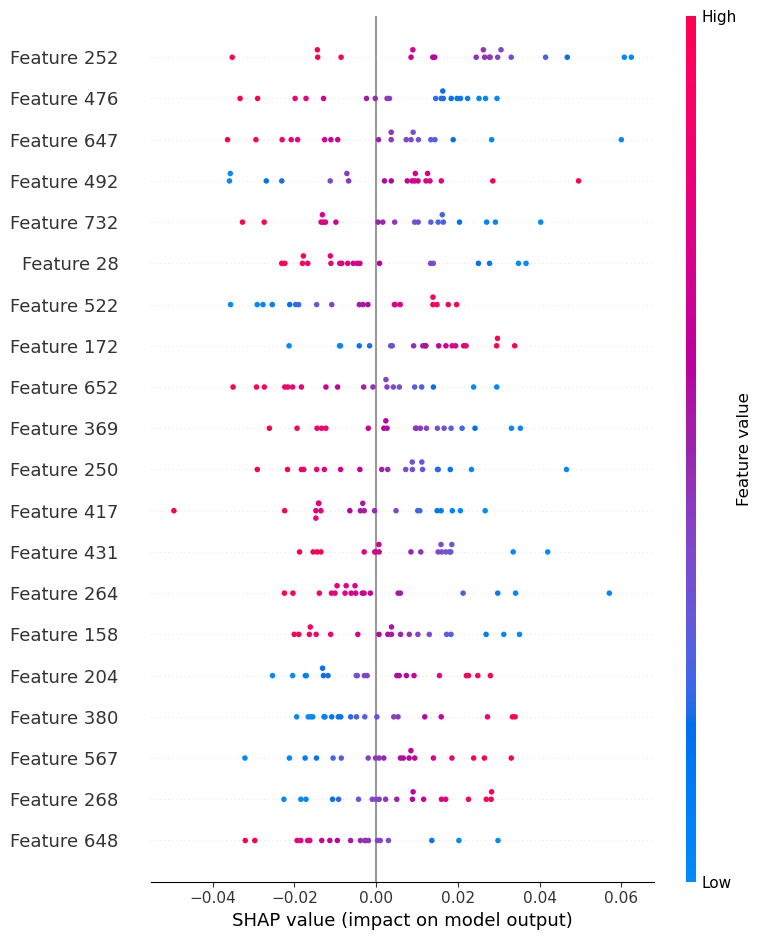

In [135]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Create SHAP explainer
explainer = shap.Explainer(classifier, X_train)

# Compute SHAP values for the test set
shap_values = explainer(X_test)

# Plot summary of feature importance
shap.summary_plot(shap_values, X_test)


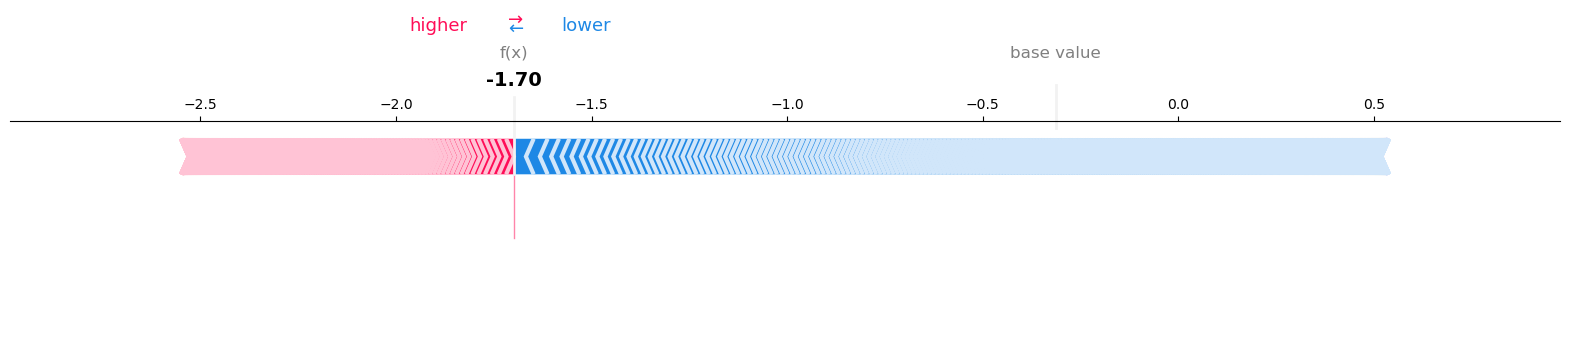

In [143]:
X_test_df = pd.DataFrame(X_test)
explainer = shap.Explainer(classifier, X_train)
shap_values = explainer(X_test_df)
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test_df.iloc[0], matplotlib=True)


In [140]:
shap.force_plot(explainer.expected_value, shap_values, X_test[0])


ValueError: visualize() can only display Explanation objects (or arrays of them)!